In [2]:
import numpy as np
import matplotlib.pyplot as plt
from typing import Callable

In [41]:
#Zad1
'''Napisz funkcje gradient_descent_callable analogiczną do funkcji gradient_descent
zaprezentowaną na zajęciach. Jednak tym razem załóż, że funkcja, która jest optymalizowana
to Callable, które powinno podlegać minimalizacji.'''

def gradient_descent_callable(f : Callable, der: Callable, x0: np.ndarray, learning_rate : float, num_iters : int):
    """
    der - Callable - function to calculate the derivative
    f - Callable - function to be optimized (e.g. MSE for arrays)
    x0 - np.ndarray - initial values (initial guess)
    learning_rate - float - descent rate of the gradient descent algorithm
    num_iters - int - number of iterations
    """
    result = x0.copy()
    for i in range(num_iters):
        new_x = result[0] - learning_rate * der(result[0])
        new_y = f(new_x)

        result = (new_x, new_y)

    return result

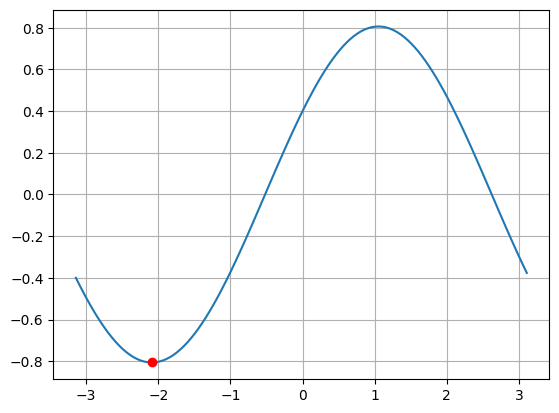

In [46]:
#TEST
start = -np.pi
stop = np.pi
step = 0.05
x = np.arange(start, stop, step)

f = lambda x: 0.4*np.cos(x) + 0.7*np.sin(x)

der = lambda x: -0.4*np.sin(x) + 0.7*np.cos(x)

x0 = [-1, f(-1)]
learning_rate = 0.1
num_iters = 100

v = gradient_descent_callable(f, der, x0, learning_rate, num_iters)

plt.figure()
plt.plot(x, f(x))
plt.plot(v[0], v[1], 'ro')
plt.grid(True)
plt.show()

In [ ]:
#Zad2
'''Napisz funkcję newton_method_optimization tak aby metoda Newtona była wykorzystana do szukania optimum'''

def newton_method_optimization(x : np.ndarray, f : np.ndarray, x0: np.ndarray, num_iters : int):
    """
    x - points where to function is defined
    f - values of function to be optimized
    x0 - initial guess
    num_iters - number of iterations
    """
    result = x0

    step = x[1] - x[0]

    #calculate derivatives
    df = np.gradient(f, step)
    ddf = np.gradient(df, step)

    #calculate values of derivatives using interpolation
    for i in range(num_iters):
      f0 = np.interp(result, x, f)
      df0 = np.interp(result, x, df)
      ddf0 = np.interp(result, x, ddf)

      result = result - df0/ddf0

      print(f"DF: {df0}, DDF: {ddf0}")
      print(f"Current iter: {i}, Current value: {result}, Function value: {f0, df0, ddf0}, Current result: {result}")

    return result

DF: [-3.37906579], DDF: [8.96551973]
Current iter: 0, Current value: [-0.37310431], Function value: (array([-0.21515252]), array([-3.37906579]), array([8.96551973])), Current result: [-0.37310431]
DF: [0.55754759], DDF: [10.04718745]
Current iter: 1, Current value: [-0.42859721], Function value: (array([-0.75899851]), array([0.55754759]), array([10.04718745])), Current result: [-0.42859721]
DF: [-0.0163021], DDF: [10.58860395]
Current iter: 2, Current value: [-0.42705762], Function value: (array([-0.77512413]), array([-0.0163021]), array([10.58860395])), Current result: [-0.42705762]
DF: [0.00020337], DDF: [10.57887913]
Current iter: 3, Current value: [-0.42707684], Function value: (array([-0.77540681]), array([0.00020337]), array([10.57887913])), Current result: [-0.42707684]
DF: [-2.72626692e-06], DDF: [10.57900056]
Current iter: 4, Current value: [-0.42707658], Function value: (array([-0.77540328]), array([-2.72626692e-06]), array([10.57900056])), Current result: [-0.42707658]
DF: [

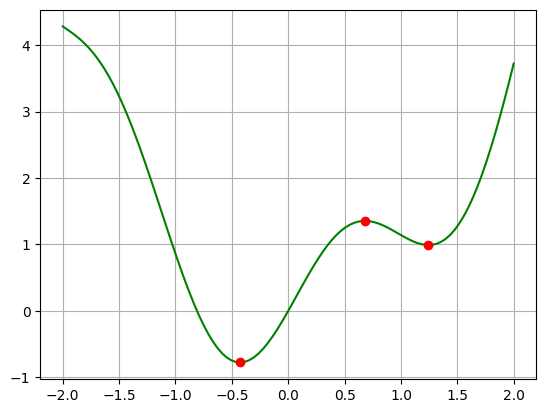

In [ ]:
#TEST

start = -2
stop = 2
samples = 100

x = np.linspace(start, stop, samples)

f = x**2 + np.sin(x*3)

num_iters = 10

x0 = np.array([-0.75])
result_1 = newton_method_optimization(x, f, x0, num_iters)
print(f"Result_1: {result_1}")

x2 = np.array([1.5])
result_2 = newton_method_optimization(x, f, x2, num_iters)
print(f"Result_2: {result_2}")

x3 = np.array([-1])
result_3 = newton_method_optimization(x, f, x3, num_iters)
print(f"Result_3: {result_3}")


plt.figure()
plt.plot(x, f, "g-")
plt.plot(result_1, np.interp(result_1, x, f), "ro")
plt.plot(result_2, np.interp(result_2, x, f), "ro")
plt.plot(result_3, np.interp(result_3, x, f), "ro")
plt.grid(True)
plt.show()